In [71]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

## PrefixSpan

In [81]:
data = pd.read_csv('inputprefixspan.csv')

In [82]:
X = data.drop(columns = ['target', 'user_session', 'sequences'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [83]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))
print('Original dataset shape %s' % Counter(X_train))

Original dataset shape Counter({0: 326172, 1: 15689})
Original dataset shape Counter({'[2]': 1, '[2, 2, 2]': 1, '[2, 2]': 1, '[2, 2, 2, 2]': 1, '[2, 2, 2, 2, 2]': 1})


In [84]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_test))
print('Original dataset shape %s' % Counter(X_test))

Original dataset shape Counter({0: 139882, 1: 6631})
Original dataset shape Counter({'[2]': 1, '[2, 2, 2]': 1, '[2, 2]': 1, '[2, 2, 2, 2]': 1, '[2, 2, 2, 2, 2]': 1})


In [85]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [86]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [87]:
X_train, y_train = undersample.fit_resample(X_train, y_train)

In [52]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))
print('Original dataset shape %s' % Counter(X_train))

Original dataset shape Counter({0: 15689, 1: 15689})
Original dataset shape Counter({'[2]': 1, '[2, 2, 2]': 1, '[2, 2]': 1, '[2, 2, 2, 2]': 1, '[2, 2, 2, 2, 2]': 1})


In [53]:
Class = [len(y_train.loc[y_train == 1]), len(y_train.loc[y_train == 0])]
pd.Series(Class, index = ['Purchase', 'No-Purchase'], name = 'target')

Purchase       15689
No-Purchase    15689
Name: target, dtype: int64

In [54]:
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan', 'chebyshev']}

In [55]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [56]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


In [57]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}

In [58]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform',algorithm = 'auto',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_pred = knn.predict(X_test)

In [60]:
# eveluate the model
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('precision:', metrics.precision_score(y_test, y_pred, zero_division = 0))
print('recall:', metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))

[[139882      0]
 [  6631      0]]
precision: 0.0
recall: 0.0
Accuracy: 0.9547412175028837
F1-score: 0.0


## ClaSP

In [61]:
clasp = pd.read_csv('inputclasp.csv')

In [62]:
features = clasp.iloc[:,2:7]

In [63]:
label = clasp.iloc[:,-1:]

In [64]:
X1 = clasp.drop(columns = ['target', 'user_session', 'sequences'])
y1 = clasp['target']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

In [65]:
X_train1, y_train1 = undersample.fit_resample(X_train1, y_train1)

In [66]:
g_res1 = gs.fit(X_train1, y_train1)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


In [67]:
g_res1.best_params_

{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}

In [68]:
# use the best hyperparameters
knn1 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform',algorithm = 'auto',metric = 'minkowski')
knn1.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=3)

In [69]:
y_pred1 = knn1.predict(X_test1)

In [70]:
# eveluate the model
from sklearn import metrics
print(confusion_matrix(y_test1, y_pred1))
print('precision:', metrics.precision_score(y_test1, y_pred1))
print('recall:', metrics.recall_score(y_test1, y_pred1))
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("F1-score:",f1_score(y_test1, y_pred1))

[[139856     26]
 [  6599     32]]
precision: 0.5517241379310345
recall: 0.004825818126979339
Accuracy: 0.9547821695003174
F1-score: 0.00956794737628943


## VMSP

In [28]:
vmsp = pd.read_csv('inputvmsp.csv')

In [30]:
X2 = vmsp.drop(columns = ['target', 'user_session', 'sequences'])
y2 = vmsp['target']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [31]:
X_train2, y_train2 = undersample.fit_resample(X_train2, y_train2)

In [32]:
g_res2 = gs.fit(X_train2, y_train2)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


In [33]:
g_res2.best_params_

{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}

In [34]:
# use the best hyperparameters
knn2 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform',algorithm = 'auto',metric = 'minkowski')
knn2.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred2 = knn2.predict(X_test2)

In [37]:
# eveluate the model
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test2, y_pred2))
print('precision:', metrics.precision_score(y_test2, y_pred2))
print('recall:', metrics.recall_score(y_test2, y_pred2))
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("F1-score:",f1_score(y_test2, y_pred2))

[[139882      0]
 [  6631      0]]
precision: 0.0
recall: 0.0
Accuracy: 0.9547412175028837
F1-score: 0.0


# Visualization

In [74]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [75]:
# for pfs
test_scores1 = []
train_scores1 = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores1.append(knn.score(X_train,y_train))
    test_scores1.append(knn.score(X_test,y_test))

Text(0.5, 0, 'Values of K')

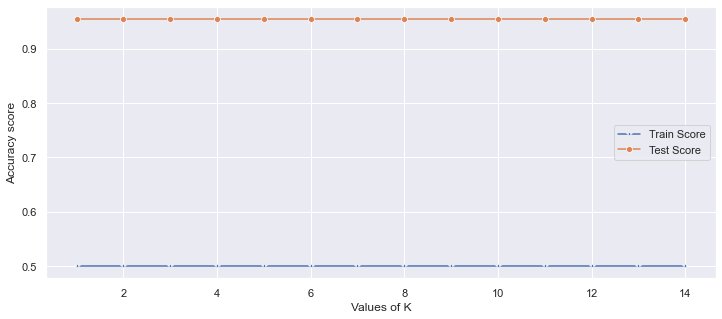

In [76]:
# for pfs
plt.figure(figsize=(12,5))

p = sns.lineplot(range(1,15),train_scores1,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores1,marker='o',label='Test Score')
plt.ylabel('Accuracy score')
plt.xlabel('Values of K')

In [77]:
# for clasp
test_scores2 = []
train_scores2 = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train1,y_train1)
    
    train_scores2.append(knn.score(X_train1,y_train1))
    test_scores2.append(knn.score(X_test1,y_test1))

Text(0.5, 0, 'Values of K')

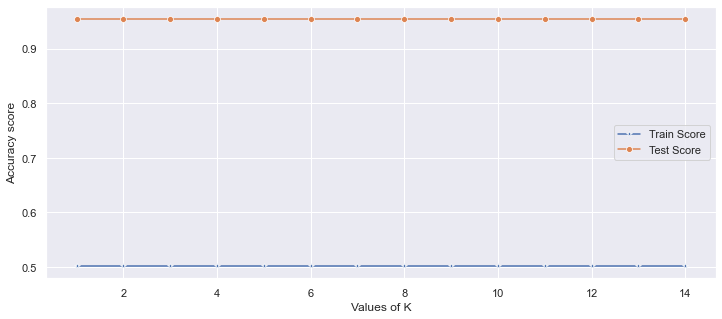

In [78]:
# for clasp
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores2,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores2,marker='o',label='Test Score')
plt.ylabel('Accuracy score')
plt.xlabel('Values of K')

In [38]:
# for VMSP
test_scores3 = []
train_scores3 = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train2,y_train2)
    
    train_scores3.append(knn.score(X_train2,y_train2))
    test_scores3.append(knn.score(X_test2,y_test2))

Text(0.5, 0, 'Values of K')

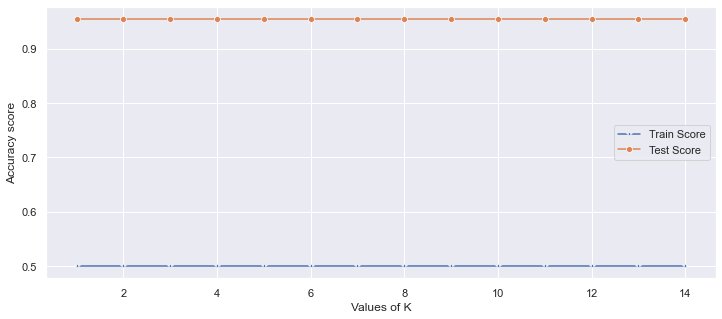

In [40]:
# for vmsp
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores3,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores3,marker='o',label='Test Score')
plt.ylabel('Accuracy score')
plt.xlabel('Values of K')

In [187]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [188]:
def confusio_matrix(y_test, y_predicted):
    cm = metrics.confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(5,5))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
  
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

Text(0.5, 12.5, 'Predicted label')

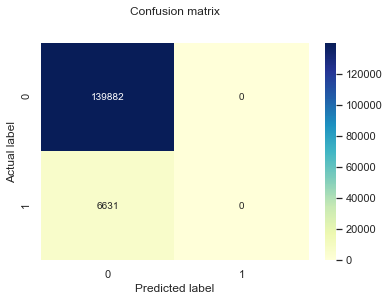

In [189]:
# prefixspan
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#print(confusio_matrix(y_test, y_pred))

Text(0.5, 12.5, 'Predicted label')

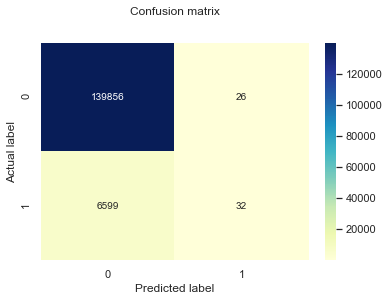

In [190]:
#clasp
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1, y_pred1)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#print(confusio_matrix(y_test1, y_pred1))

Text(0.5, 12.5, 'Predicted label')

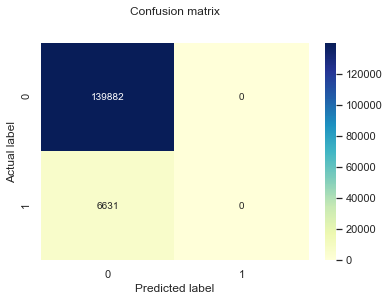

In [79]:
#VMSP
y_pred = knn2.predict(X_test2)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test2, y_pred2)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#print(confusio_matrix(y_test2, y_pred2))

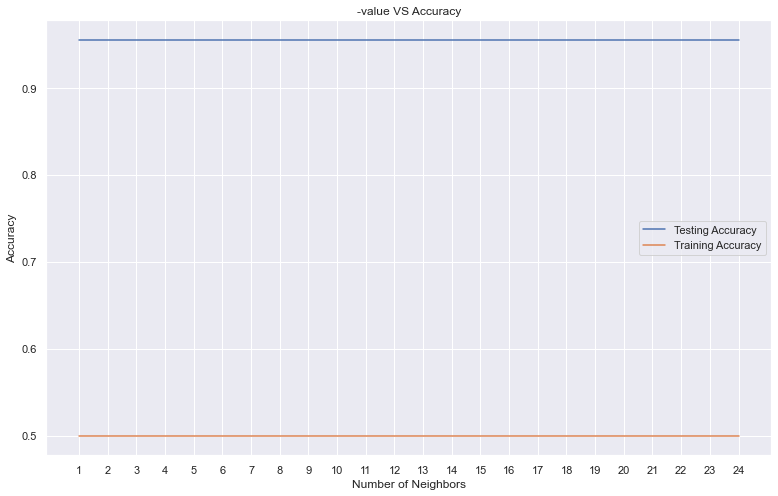

Best accuracy is 0.9547412175028837 with K = 1


In [90]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))